In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [31]:
df=pd.read_csv("C:/Users/prash/Pictures/Group 4_ForestCoverType/covtype.csv")
df.columns=['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology',
                        'Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways',
                        'Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
                        'Horizontal_Distance_To_Fire_Points','Rawah_Wilderness_Area','Neota_Wilderness_Area',
            'Comanche_Peak_Wilderness_Area','Cache_la_Poudre_Wilderness_Area',"Soil_code_2702",
                        "Soil_code_2703","Soil_code_2704","Soil_code_2705","Soil_code_2706","Soil_code_2717",
                        "Soil_code_3501","Soil_code_3502","Soil_code_4201","Soil_code_4703","Soil_code_4704",
                        "Soil_code_4744","Soil_code_4758","Soil_code_5101","Soil_code_5151","Soil_code_6101",
                        "Soil_code_6102","Soil_code_6731","Soil_code_7101","Soil_code_7102","Soil_code_7103",
                        "Soil_code_7201","Soil_code_7202","Soil_code_7700","Soil_code_7701","Soil_code_7702",
                        "Soil_code_7709","Soil_code_7710","Soil_code_7745","Soil_code_7746","Soil_code_7755",
                        "Soil_code_7756","Soil_code_7757","Soil_code_7790","Soil_code_8703","Soil_code_8707",
                        "Soil_code_8708","Soil_code_8771","Soil_code_8772","Soil_code_8776",'Cover_Type']

In [32]:
df['Distance_To_Hydrology']=np.round(np.sqrt(df['Horizontal_Distance_To_Hydrology']**2+
                                             df['Vertical_Distance_To_Hydrology']**2),2)

In [33]:
df.drop(['Slope','Horizontal_Distance_To_Hydrology',
                        'Vertical_Distance_To_Hydrology',
                        'Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
                        'Rawah_Wilderness_Area','Neota_Wilderness_Area',
            'Comanche_Peak_Wilderness_Area','Cache_la_Poudre_Wilderness_Area',"Soil_code_2702",
                        "Soil_code_2703","Soil_code_2704","Soil_code_2705","Soil_code_2706","Soil_code_2717",
                        "Soil_code_3501","Soil_code_3502","Soil_code_4201","Soil_code_4703","Soil_code_4704",
                        "Soil_code_4744","Soil_code_4758","Soil_code_5101","Soil_code_5151","Soil_code_6101",
                        "Soil_code_6102","Soil_code_6731","Soil_code_7101","Soil_code_7102","Soil_code_7103",
                        "Soil_code_7201","Soil_code_7202","Soil_code_7700","Soil_code_7701","Soil_code_7702",
                        "Soil_code_7709","Soil_code_7710","Soil_code_7745","Soil_code_7746","Soil_code_7755",
                        "Soil_code_7756","Soil_code_7757","Soil_code_7790","Soil_code_8703","Soil_code_8707",
                        "Soil_code_8708","Soil_code_8771","Soil_code_8772","Soil_code_8776"],axis=1,inplace=True)

In [34]:
pd.set_option('display.max_columns',None)
colsrf=['Elevation', 'Aspect', 'Horizontal_Distance_To_Roadways',
       'Horizontal_Distance_To_Fire_Points', 'Distance_To_Hydrology']

In [35]:
df.head()

,Elevation,Aspect,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Cover_Type,Distance_To_Hydrology
0,2590,56,390,6225,5,212.08
1,2804,139,3180,6121,2,275.77
2,2785,155,3090,6211,2,269.24
3,2595,45,391,6172,5,153.00
4,2579,132,67,6031,2,300.37


## Train Test Split with Statification

In [36]:
from sklearn.model_selection import train_test_split
X=df.drop('Cover_Type',1)
y=df['Cover_Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,
                                                            stratify=df['Cover_Type'])
# dd=pd.concat([X_working,y_working],axis=1)
pd.concat([df['Cover_Type'].value_counts(normalize=True).mul(100),y_train.value_counts(normalize=True).mul(100)
          ,y_test.value_counts(normalize=True).mul(100)],axis=1, keys=['Population','Train','Test'])

,Population,Train,Test
2,48.760006,48.759918,48.760212
1,36.460583,36.460646,36.460437
3,6.153756,6.153816,6.153617
7,3.530054,3.530060,3.530039
6,2.989100,2.989130,2.989031
5,1.633704,1.633608,1.633927
4,0.472797,0.472822,0.472737


## Balancing Using SMOTE

In [37]:
sm = SMOTE(random_state=42)
X_res, y_res = X_train, y_train 
X_train, y_train = sm.fit_resample(X_res, y_res)
X_train=pd.DataFrame(data=X_train, columns=X.columns)

In [38]:
print('X_train.shape',X_train.shape)
print('y_train.shape',y_train.shape)

X_train.shape (1388170, 5)
y_train.shape (1388170,)


### Running the Final Model with Hyperparameters

In [39]:
X_train=pd.DataFrame(data=X_train,columns=X.columns)
rf = RandomForestClassifier(n_jobs=-1,criterion='entropy',n_estimators=50,random_state=42,
                            class_weight='balanced',max_depth=25)
rf.fit(X_train,y_train)
rfpred=rf.predict(X_test)
trainRF=rf.predict(X_train)
cm= confusion_matrix(y_test,rfpred)
print("The Hyper Parameters are: criterion='entropy',n_estimators=50,random_state=42,class_weight='balanced',max_depth=25")
print('Train Recall',metrics.recall_score(y_train, trainRF, average='weighted'))
print('Test Recall',metrics.recall_score(y_test,rfpred, average='weighted'))

The Hyper Parameters are: criterion='entropy',n_estimators=50,random_state=42,class_weight='balanced',max_depth=25
Train Recall 0.9998364753596461
Test Recall 0.9550670093629521


# Metrics

In [40]:
print("The accuracy of the Train is: ", metrics.accuracy_score(y_train, trainRF))
print("The accuracy of the Test is: ", metrics.accuracy_score(y_test,rfpred))

The accuracy of the Train is:  0.9998364753596461
The accuracy of the Test is:  0.9550670093629521


In [41]:
print("The f1_weighted of the Train is: ", metrics.f1_score(y_train, trainRF,average='weighted'))
print("The f1_weighted of the Test is: ", metrics.f1_score(y_test,rfpred,average='weighted'))

The f1_weighted of the Train is:  0.9998364581975809
The f1_weighted of the Test is:  0.9551662273823236


In [42]:
print("The f1_weighted of the Train is: ", metrics.f1_score(y_train, trainRF,average='weighted'))
print("The f1_weighted of the Test is: ", metrics.f1_score(y_test,rfpred,average='weighted'))

The f1_weighted of the Train is:  0.9998364581975809
The f1_weighted of the Test is:  0.9551662273823236


In [43]:
print(metrics.classification_report(y_test,rfpred))

              precision    recall  f1-score   support

           1       0.96      0.96      0.96     63552
           2       0.97      0.96      0.96     84991
           3       0.93      0.95      0.94     10726
           4       0.84      0.92      0.88       824
           5       0.86      0.91      0.88      2848
           6       0.89      0.93      0.91      5210
           7       0.95      0.98      0.96      6153

    accuracy                           0.96    174304
   macro avg       0.91      0.94      0.93    174304
weighted avg       0.96      0.96      0.96    174304



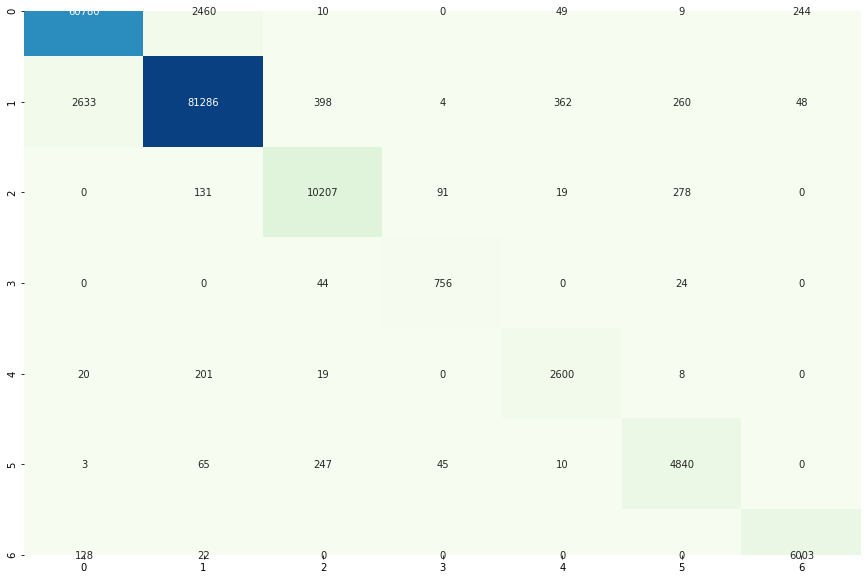

In [44]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, fmt='d', cmap='GnBu', cbar=False, annot=True)

In [45]:
misclassified = (y_test!=rfpred).sum()
print('Misclassified samples: {}'.format(misclassified))

Misclassified samples: 7832
